# DENSITY FUNCTIONAL THEORY USING PYSCF 

In this tutorial we will discuss how to perform Density Functional Theory calculations for various molecules using the PySCF library.


## Colab

This tutorial and the rest in this sequence can be done in Google colab. If you'd like to open this notebook in colab, you can use the following link

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/deepchem/deepchem/blob/master/examples/tutorials/Density_Functional_Theory_using_PySCF.ipynb)

## Setup 

### Installing libraries

In [1]:
! pip install pyscf 

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


### Import required modules

In [1]:
import pyscf 
from pyscf import gto
from pyscf import dft
import matplotlib
import matplotlib.pyplot as plt 
import math 

## Introduction to DFT


### Uses of DFT

Density functional theory (DFT) is a type of electronic structure calculation that is becoming increasingly popular. It can be used to predict a material's crystal structure. It can also be used to calculate transport properties such as optical conductivity (such as dielectric constant), thermodynamic properties (such as specific heat). Spectroscopic properties, such as the photoemission spectra, may also be calculated using the DFT framework. 


### The many body problem 

The wave function is a useful mathematical construct for calculating the total energy of atoms and molecules, as well as other features. These Schrodinger's wave equations can be solved very easily for a single particle system, by solving the differential equations using well known methods such as finite element method (FEM).

However, it can be very computationally expensive to compute even for few particle systems. 

![poteq.jpg](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/assets/poteq.jpg) 

This is the potential energy term of the Schodinger's equation of a many particle system. 

![kineq.jpg](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/assets/kineq.jpg) 

This is the kinetic energy term of the Schodinger's equation of a many particle system.

As we can see from the equations, the summation is over all electrons and ions in the system, which would be of the order of 10^23 particles , resulting in a large number of unknown variables.
Reference: [1]

### Kohn Sham Density Functional Theory 

The first Hohenberg–Kohn theorem states that 'the ground state of any interacting many particle system with a given fixed inter-particle interaction is a unique functional of the electron density i.e. n(r)'. (Here, r is the position in space and n(r) is the density of the electron at that position, it is in fact an expectation value.)

i.e  E[n(r)] where E is the ground state energy. (It's a property of all electrons in the system)
(Which is where the term "Density Functional" is derived from) 

The minimization of this energy term is used to calculate the ground state energy. In order to derive the equation, we will start by looking at the basic Schrodinger's equation:
![schrodinger1.jpg](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/assets/schrodinger1.jpg) 

Here,  $ \Psi $ is the wave function, H is the Hamiltonian Operator, and E is the Eigen Energy. The minimisation of this energy gives us the Ground state energy; 

![minimizationeq.jpg](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/assets/minimizationeq.jpg) 

On combining the equations and the theorem we get the following equations:

![ks1.jpg](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/assets/ks1.jpg) 

![ks2.jpg](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/assets/ks2.jpg) 

The density function can be calculated using the following formula, where $ \Phi $ (r) is the normalized trial function:

![densityfn.jpg](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/assets/densityfn.jpg)

This leads to the final derivation of the Kohn-Sham energy equation:

![KSeq1.jpg](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/assets/KSeq1.jpg)

Where Exc and vxc are the 'Exchange Correlational' energy, and potential respectively. We will discuss this in the next section of this tutorial. 

### Exchange Correlation Functional 

The exchange correlation energy approximation used in the Kohn-Sham DFT approach can be defined as the difference between the true functional and the remaining terms, and the exchange correlation potential is defined as the difference between the fermi potential and pauli potential. [Reference:5] There are a many existing Exchange correlation functionals such as the LDA and the GGA, which are also classes of functionals. (Read more about them from [Reference:4]) In this tutorial we are using the Perdew–Burke–Ernzerhof exchange-correlation functional. 


## Building the Molecule 

- The 'gto' command is used to initialise the molecule.
- The three numbers beside the atom determine it's coordinates in the basis system. 

NOTE: The choice of a suitable basis is an important aspect of the calculations.
For molecules, a localized basis set is appropriate, while for bulk periodic systems or metallic systems, extended plane wave basis sets are suitable. For molecular systems, a basis set that better represents molecular orbitals would result in an optimal number of Kohn Sham equations, and hence the computational expense depends on the choice of the basis. 

We can read more on basis sets from the reference below:


[ Basis Sets in Quantum Chemistry](http://vergil.chemistry.gatech.edu/courses/chem6485/pdf/basis-sets.pdf)


### The example shown below is for a water molecule 

In [2]:
mol = gto.M(
    atom = '''
    O  0.   0.       0.
    H  0.   2.       0.
    H  0.   0.       2. ''',
    basis = 'ccpvdz')

### Numerical Grids

Either rectangular or radial grids may be used depending on the problem. The examples in this tutorial use radial grids. An example below (where the molecule is the water molecule built above) shows the difference between two slightly difference grids being used, just for reference.

In [3]:
method = dft.KS(mol)
print('Default DFT(LDA).  E = %.12f' % method.kernel())
method = dft.KS(mol)
method.grids.radi_method = dft.mura_knowles
print('Changed radial grids for DFT.  E = %.12f' % method.kernel())

converged SCF energy = -75.5217424548572
Default DFT(LDA).  E = -75.521742454857
converged SCF energy = -75.5217423020953
Changed radial grids for DFT.  E = -75.521742302095


## Example - Hydrogen Fluoride:

This example shows how to calculate the molecular orbital energy using the Kohn Shahm Density Functional theory. Here we are using a pre defined basis and xc functional known as the 

In [39]:
mol = pyscf.M(
    atom = 'H 0 0 0; F 0 0 0.1', 
    basis = '631g',
    symmetry = True,
)
#mf1 = dft.RKS(mol).run(xc='pbe')
mf2=mol.HF()
mf2.kernel()
mf2.analyze()
mf = mol.KS()
mf.xc = 'pbe'
mf.kernel()
mf.analyze()

converged SCF energy = -71.5735590909426
Wave-function symmetry = Coov
occupancy for each irrep:     A1  E1x  E1y
                               3    1    1
**** MO energy ****
MO #1 (A1 #1), energy= -28.9454187939049 occ= 2
MO #2 (A1 #2), energy= -1.77535811204063 occ= 2
MO #3 (A1 #3), energy= -0.9457582415163 occ= 2
MO #4 (E1x #1), energy= -0.814673827313762 occ= 2
MO #5 (E1y #1), energy= -0.814673827313761 occ= 2
MO #6 (A1 #4), energy= 0.340639849624415 occ= 0
MO #7 (A1 #5), energy= 1.20070365279223 occ= 0
MO #8 (E1x #2), energy= 1.31069392270214 occ= 0
MO #9 (E1y #2), energy= 1.31069392270213 occ= 0
MO #10 (A1 #6), energy= 2.11121465979258 occ= 0
MO #11 (A1 #7), energy= 23.1013269223624 occ= 0
 ** Mulliken atomic charges  **
charge of  0H =      0.48310
charge of  1F =     -0.48310
Dipole moment(X, Y, Z, Debye):  0.00000,  0.00000, -0.69500
converged SCF energy = -71.863815916928
Wave-function symmetry = Coov
occupancy for each irrep:     A1  E1x  E1y
                              

((array([5.51857769e-01, 1.61858866e-03, 1.99951716e+00, 1.44208075e+00,
         4.85877110e-03, 1.97769375e+00, 1.97769375e+00, 1.93361714e+00,
         2.23062495e-02, 2.23062495e-02, 6.64498212e-02]),
  array([ 0.44652364, -0.44652364])),
 array([ 0.        ,  0.        , -0.69813382]))

## Calculating Minimum SCF Energy

In the code below, we are generating molecules based on an initial molecule wrt a given displacement (here we have chosen 0.1 Angstrom). On running DFT calculations on these molecules, we can find the bond length at which the SCF energy is the lowest; hence the molecule is more stable. 

First, we define the parameters such as the displacement: 

In [45]:
mol_a = []
bondl=[]
cscf=[]
coords = mol.atom_coords()
natoms = len(coords)
disp=0.1

The lines below generate 6N molecules around the initial molecule that we had built. (here, N=5):

In [46]:
for k in range(50): 
    for i in range(natoms):
            for x in range(3):
                new_coords_a = coords.copy()
                new_coords_a[i][x] += disp
                atoma = [[mol.atom_symbol(j), coord] for (j, coord) in zip(range(natoms), new_coords_a)]               
                mol_a.append(mol.set_geom_(atoma, inplace=False, unit='B'))
                print(mol_a)
                mf = mol_a[x].HF()
                mf.xc = 'pbe' 
                if x==2:
                    bondl.append(math.dist(new_coords_a[0],new_coords_a[1])) 
                    cscf.append(mf.kernel())
    disp=disp+0.01

[<pyscf.gto.mole.Mole object at 0x1114c8820>, <pyscf.gto.mole.Mole object at 0x12cc13ee0>]
[<pyscf.gto.mole.Mole object at 0x1114c8820>, <pyscf.gto.mole.Mole object at 0x12cc13ee0>, <pyscf.gto.mole.Mole object at 0x1117c31c0>]
converged SCF energy = -22.8696919205107
[<pyscf.gto.mole.Mole object at 0x1114c8820>, <pyscf.gto.mole.Mole object at 0x12cc13ee0>, <pyscf.gto.mole.Mole object at 0x1117c31c0>, <pyscf.gto.mole.Mole object at 0x111ca18b0>]
[<pyscf.gto.mole.Mole object at 0x1114c8820>, <pyscf.gto.mole.Mole object at 0x12cc13ee0>, <pyscf.gto.mole.Mole object at 0x1117c31c0>, <pyscf.gto.mole.Mole object at 0x111ca18b0>, <pyscf.gto.mole.Mole object at 0x12cc41550>]
[<pyscf.gto.mole.Mole object at 0x1114c8820>, <pyscf.gto.mole.Mole object at 0x12cc13ee0>, <pyscf.gto.mole.Mole object at 0x1117c31c0>, <pyscf.gto.mole.Mole object at 0x111ca18b0>, <pyscf.gto.mole.Mole object at 0x12cc41550>, <pyscf.gto.mole.Mole object at 0x112825d60>]
converged SCF energy = -22.8696919205107
[<pyscf.gto.m

AssertionError: 

### Results 

On plotting the Bond length in Angstrom versus the SCF Energy in eV, we can identify the bond length at which minimum energy is required. Hence making the molecule most stable at that bond length. (Under these specific periodic boundary conditions.)

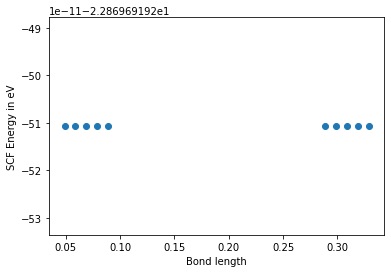

In [ ]:
plt.scatter(bondl,cscf) 
plt.xlabel("Bond length")
plt.ylabel("SCF Energy in eV")
plt.show() 


As seen from the output, the lowest SCF energy is at about 1.9 Angstrom bond length. 


In [ ]:
import torch
import xitorch.optimize

# This example shows how to get the equilibrium positions using DQC, xitorch, and pytorch

def get_ene(atompos: torch.Tensor) -> torch.Tensor:
    atomzs = ["H", "H"]  # H2
    mol = pyscf.M(atomzs, atompos, basis="3-21G")
    #qc = dqc.HF(mol).run()
    print(atompos)
    ene1 = dft.RKS(mol).run(xc='pbe')
    #ene = qc.energy()  # calculate the energy
    print(ene1)
    return ene1 

atompos0 = torch.tensor([[1, 0, 0], [-1, 0, 0]], dtype=torch.float64)
minpos = xitorch.optimize.minimize(get_ene, atompos0, method="gd", maxiter=200,
                                   step=1e-2, verbose=True)

print("Equilibrium position:")
print(minpos)

TypeError: M() takes 0 positional arguments but 2 were given

## Self Consistency of the Kohn Sham DFT

From this tutorial we can see, that we are able to write the ground state energy of a many particle system as a functional of electron densities. Using this density we calculate the potential energy (potentials) of the system by minimization the energy term, which in turn can be used to solve the many body Schrodinger's equations and build a new set of wave functions. This way, a many particle system is treated as several single-particle systems. Hence, the many body problem can be solved using the Density Functional Theory.

## Citations:
 - [1] Clark, S., 2012. The Many-Electron Schrödinger Equation. [online] Cmt.dur.ac.uk. Available at: <http://cmt.dur.ac.uk/sjc/thesis_mcg/node161.html> [Accessed 10 June 2022].
 - [2] Baseden, Kyle A., and Jesse W. Tye. "Introduction to density functional theory: calculations by hand on the helium atom." Journal of Chemical Education 91.12 (2014): 2116-2123.
 - [3] Jinnouchi, Ryosuke, and Ryoji Asahi. "Predicting catalytic activity of nanoparticles by a DFT-aided machine-learning algorithm." The journal of physical chemistry letters 8.17 (2017): 4279-4283.
 - [4] Kohn, Walter, and Lu Jeu Sham. "Self-consistent equations including exchange and correlation effects." Physical review 140.4A (1965): A1133.
 - [5] Paier, Joachim, et al. "The Perdew–Burke–Ernzerhof exchange-correlation functional applied to the G2-1 test set using a plane-wave basis set." The Journal of chemical physics 122.23 (2005): 234102.